In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/빅데이터및AI/

/content/drive/MyDrive/빅데이터및AI


##이미지 전처리

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#훈련 및 테스트 generator 생성
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, )

test_datagen = ImageDataGenerator(rescale=1./255)

#train_ds에 훈련데이터, valid_ds에 검증 데이터, test_ds에 테스트 데이터 삽입
#사이즈는 320,320으로 설정, 배치사이즈는 64, class_mode는 분류를 위한 categorical
train_ds = train_datagen.flow_from_directory('data/data/', 
                                             target_size=(320,320), 
                                             batch_size=64, 
                                             class_mode='categorical',
                                             subset='training')

valid_ds = train_datagen.flow_from_directory('data/data/',
                                             target_size=(320,320),
                                             batch_size=64,
                                             class_mode='categorical',
                                             subset='validation')

test_ds = test_datagen.flow_from_directory('test_data/', 
                                           target_size=(320,320), 
                                           batch_size=64, 
                                           class_mode='categorical')

Found 16688 images belonging to 3 classes.
Found 4171 images belonging to 3 classes.
Found 271 images belonging to 3 classes.


In [ ]:
#훈련 데이터 generator에 데이터 증식 parameter 설정.
train_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory('data/data/',
                                      target_size=(320,320),
                                      batch_size=64,
                                      class_mode='categorical',
                                      subset='training')
valid = train_gen.flow_from_directory('data/data/',
                                      target_size=(320,320),
                                      batch_size=64,
                                      class_mode='categorical',
                                      subset='validation')

test_ds = test_gen.flow_from_directory('test_data/', 
                                           target_size=(320,320), 
                                           batch_size=64, 
                                           class_mode='categorical')


Found 16688 images belonging to 3 classes.
Found 4171 images belonging to 3 classes.
Found 271 images belonging to 3 classes.


##model1

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
with tf.device('/device:GPU:0'): 
  model1 = Sequential()

  #conv layer 1
  model1.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(320,320,3)))
  model1.add(MaxPooling2D((2,2)))

  #conv layer 2
  model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model1.add(MaxPooling2D((2,2)))

  #conv layer 3
  model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model1.add(MaxPooling2D((2,2)))

  #conv layer 4
  model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))
  model1.add(MaxPooling2D((2,2)))

  #conv layer 5
  model1.add(Conv2D(512, (3,3), activation='relu', padding='same'))
  model1.add(MaxPooling2D((2,2)))

  #FC layer
  model1.add(Flatten())
  model1.add(Dense(4096, activation='relu'))
  model1.add(Dense(3, activation='softmax'))

  model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 160, 160, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 80, 80, 64)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 40, 40, 128)     

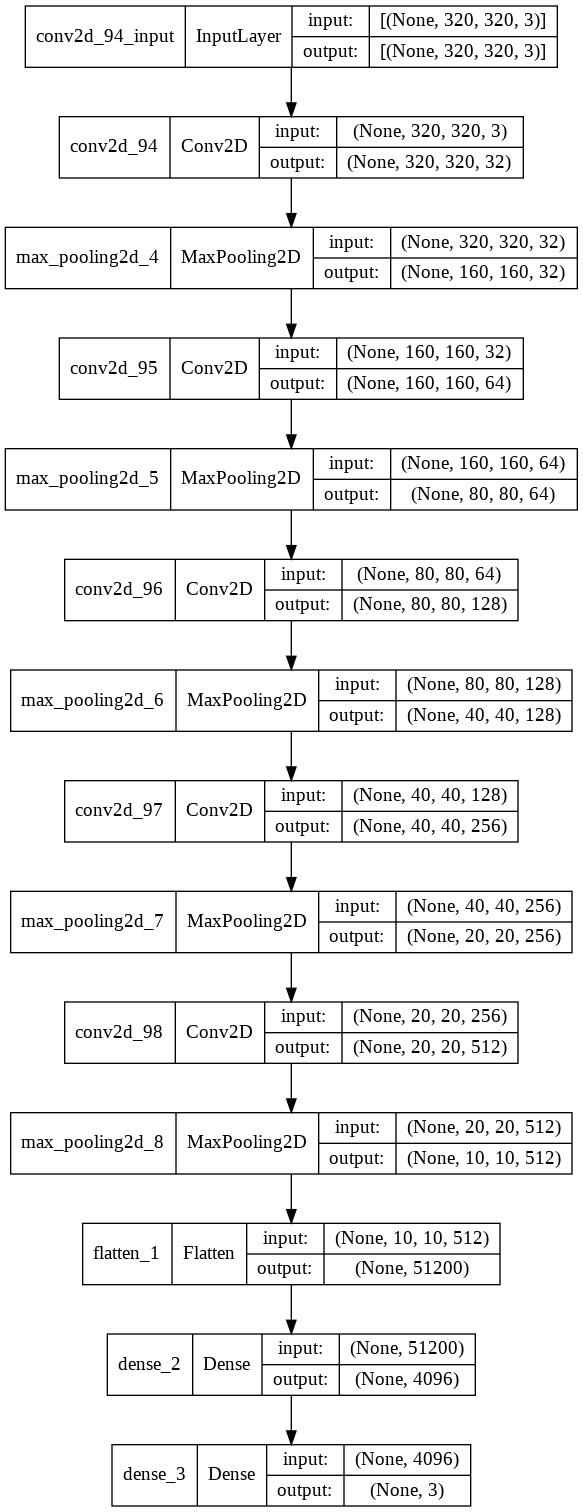

In [ ]:
keras.utils.plot_model(model1, "model1.png", show_shapes=True)

In [ ]:
#optimizer는 adam으로 설정(학습률 0.001), 손실함수는 다중분류를 위한 categorical_crossentropy 사용
#early_stopping으로 조기 멈춤 사용, 참을성 인자 7
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

#gpu에서 훈련진행.
#훈련은 epoch 50으로 하고 조기 멈춤 적용. 
#steps_per_epoch는 전체 훈련 데이터 개수를 배치사이즈로 나눈 값 사용
#validation_steps는 전체 검증 데이터 개수를 배치사이즈로 나눈 값 사용
with tf.device('/device:GPU:0'):
  history = model1.fit(train_ds,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid_ds,
                       steps_per_epoch=260,
                       validation_steps=65) 

Epoch 1/50
260/260 [==============================] - 1514s 6s/step - loss: 0.8449 - accuracy: 0.6254 - val_loss: 0.8280 - val_accuracy: 0.6353
Epoch 2/50
260/260 [==============================] - 608s 2s/step - loss: 0.5578 - accuracy: 0.7224 - val_loss: 0.9812 - val_accuracy: 0.6178
Epoch 3/50
260/260 [==============================] - 607s 2s/step - loss: 0.5035 - accuracy: 0.7484 - val_loss: 1.1390 - val_accuracy: 0.6361
Epoch 4/50
260/260 [==============================] - 604s 2s/step - loss: 0.4506 - accuracy: 0.7833 - val_loss: 1.2718 - val_accuracy: 0.6389
Epoch 5/50
260/260 [==============================] - 604s 2s/step - loss: 0.3902 - accuracy: 0.8244 - val_loss: 1.6760 - val_accuracy: 0.6442
Epoch 6/50
260/260 [==============================] - 605s 2s/step - loss: 0.3168 - accuracy: 0.8642 - val_loss: 2.0730 - val_accuracy: 0.6416
Epoch 7/50
260/260 [==============================] - 605s 2s/step - loss: 0.2357 - accuracy: 0.9045 - val_loss: 1.7944 - val_accuracy: 0.667

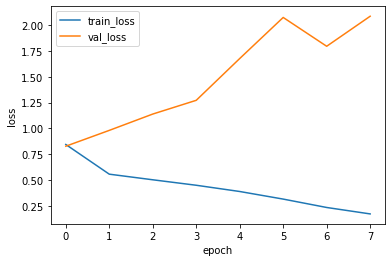

In [ ]:
#plt를 통해 훈련 및 검증 손실이 어떻게 진행되는지 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

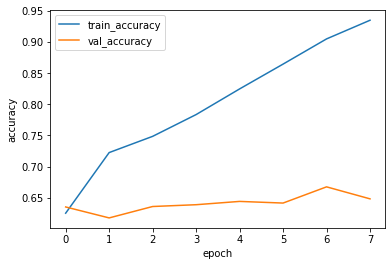

In [ ]:
#plt로 훈련 및 검증 정확도가 어떻게 진행하는지 확인
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model1.save('saved_models/model_1.h5')

In [ ]:
#테스트 집합으로 모델 정확도 측정
model = tf.keras.models.load_model('saved_models/model_1.h5')

result = model.evaluate(test_ds)
print("test accuracy: ", result[1]) 

5/5 [==============================] - 132s 32s/step - loss: 5.1892 - accuracy: 0.3469
test accuracy:  0.3468634784221649


##model2( add batchnormalization )

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
with tf.device('/device:GPU:0'): 
  model2 = Sequential()

  #conv layer 1
  model2.add(Conv2D(32, (3,3), padding='same', input_shape=(320,320,3)))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(MaxPooling2D((2,2)))

  #conv layer 2
  model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(MaxPooling2D((2,2)))

  #conv layer 3
  model2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(MaxPooling2D((2,2)))

  #conv layer 4
  model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(MaxPooling2D((2,2)))

  #conv layer 5
  model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
  model2.add(BatchNormalization())
  model2.add(Activation('relu'))
  model2.add(MaxPooling2D((2,2)))

  #FC layer
  model2.add(Flatten())
  model2.add(BatchNormalization())
  model2.add(Dense(4096, activation='relu'))
  model2.add(Dense(3, activation='softmax'))

  model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 320, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 320, 320, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 320, 320, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 160, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 160, 160, 64)     2

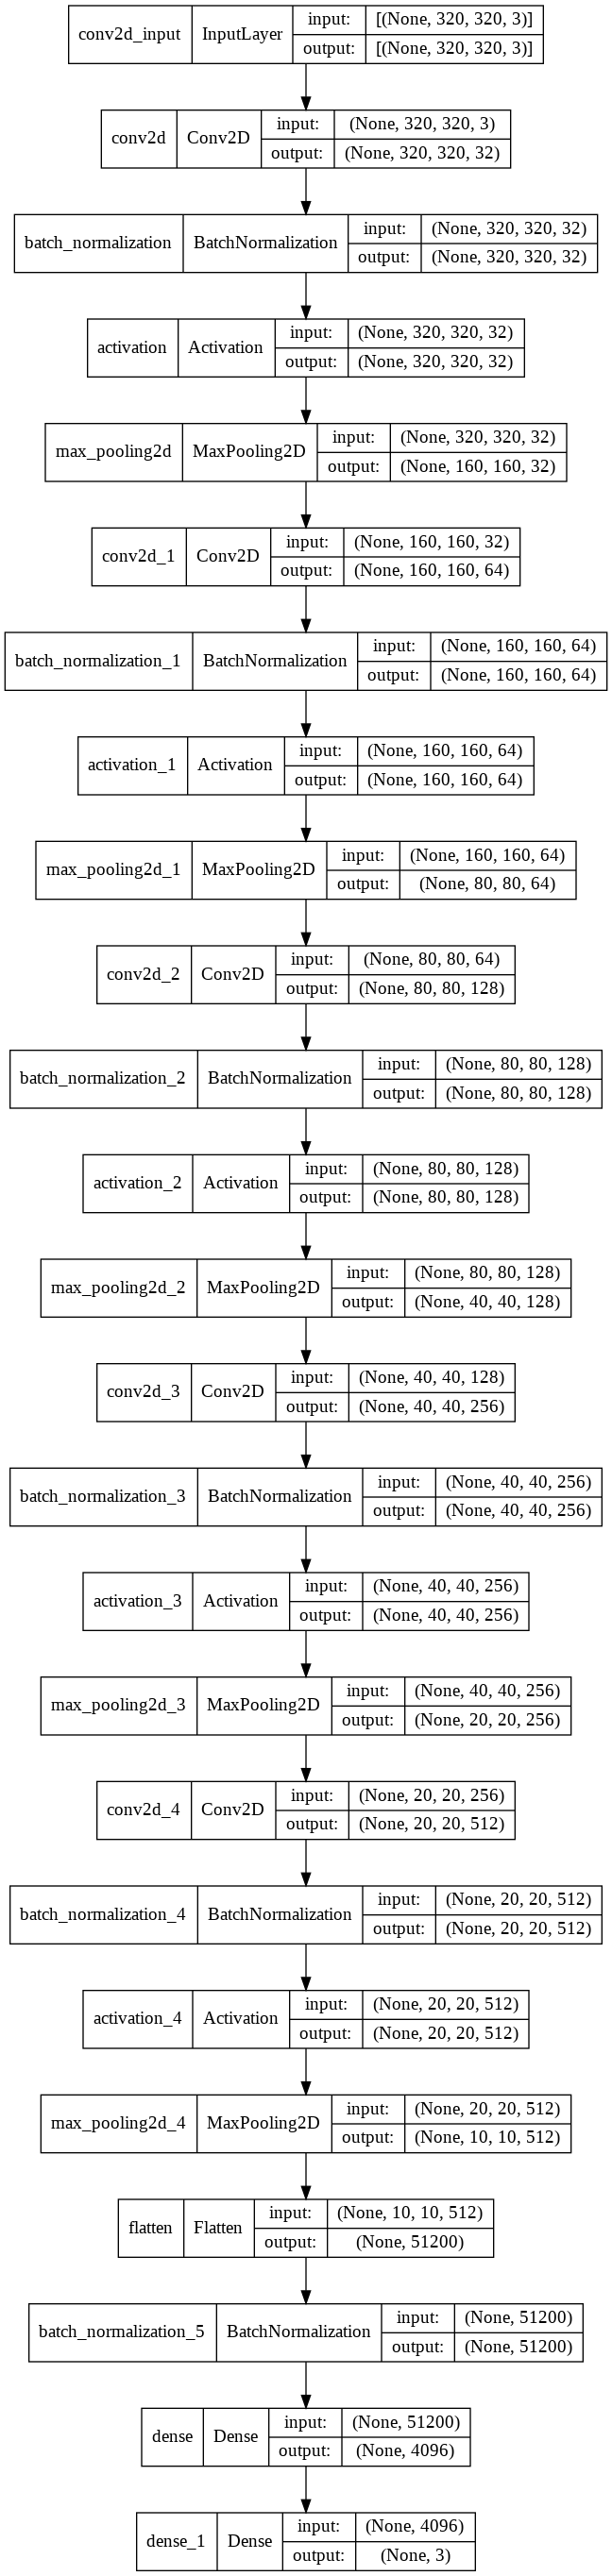

In [ ]:
keras.utils.plot_model(model2, "model2.png", show_shapes=True)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
with tf.device('/device:GPU:0'):
  history = model2.fit(train_ds,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid_ds,
                       steps_per_epoch=260,
                       validation_steps=65)

Epoch 1/50
260/260 [==============================] - 24186s 93s/step - loss: 3.0368 - accuracy: 0.6926 - val_loss: 2.4938 - val_accuracy: 0.2601
Epoch 2/50
260/260 [==============================] - 604s 2s/step - loss: 0.4731 - accuracy: 0.7925 - val_loss: 1.2155 - val_accuracy: 0.4594
Epoch 3/50
260/260 [==============================] - 595s 2s/step - loss: 0.3952 - accuracy: 0.8384 - val_loss: 4.9218 - val_accuracy: 0.5659
Epoch 4/50
260/260 [==============================] - 598s 2s/step - loss: 0.3356 - accuracy: 0.8694 - val_loss: 1.6077 - val_accuracy: 0.6060
Epoch 5/50
260/260 [==============================] - 597s 2s/step - loss: 0.2919 - accuracy: 0.8904 - val_loss: 2.2034 - val_accuracy: 0.6159
Epoch 6/50
260/260 [==============================] - 596s 2s/step - loss: 0.2563 - accuracy: 0.9098 - val_loss: 1.5481 - val_accuracy: 0.6315
Epoch 7/50
260/260 [==============================] - 597s 2s/step - loss: 0.2124 - accuracy: 0.9246 - val_loss: 1.5972 - val_accuracy: 0.6

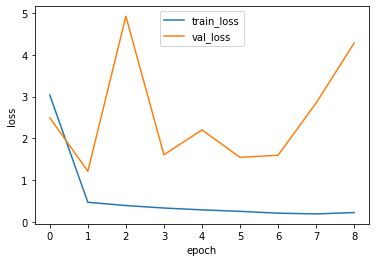

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

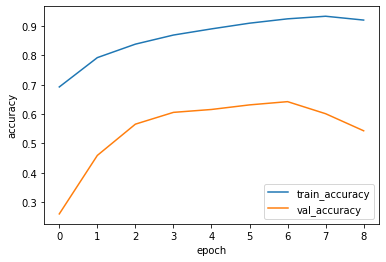

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model2.save('saved_models/model_2.h5')

In [ ]:
model = tf.keras.models.load_model('saved_models/model_2.h5')

result = model.evaluate(test_ds)
print("test accuracy: ", result[1])

5/5 [==============================] - 303s 75s/step - loss: 14.5083 - accuracy: 0.3690
test accuracy:  0.36900368332862854


##model3( add batchnormalizatoin + augmentation )

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D, BatchNormalization, Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
with tf.device('/device:GPU:0'): 
  model3 = Sequential()

  #conv layer 1
  model3.add(Conv2D(32, (3,3), padding='same', input_shape=(320,320,3)))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(MaxPooling2D((2,2)))

  #conv layer 2
  model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(MaxPooling2D((2,2)))

  #conv layer 3
  model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(MaxPooling2D((2,2)))

  #conv layer 4s
  model3.add(Conv2D(256, (3,3), activation='relu', padding='same'))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(MaxPooling2D((2,2)))

  #conv layer 5
  model3.add(Conv2D(512, (3,3), activation='relu', padding='same'))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(MaxPooling2D((2,2)))

  #FC layer
  model3.add(Flatten())
  model3.add(BatchNormalization())
  model3.add(Dense(4096))
  model3.add(BatchNormalization())
  model3.add(Activation('relu'))
  model3.add(Dense(3, activation='softmax'))
  model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 320, 320, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 320, 320, 32)     128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 320, 320, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 160, 160, 64)      18496     
                                                                 
 batch_normalization_11 (Bat  (None, 160, 160, 64)    

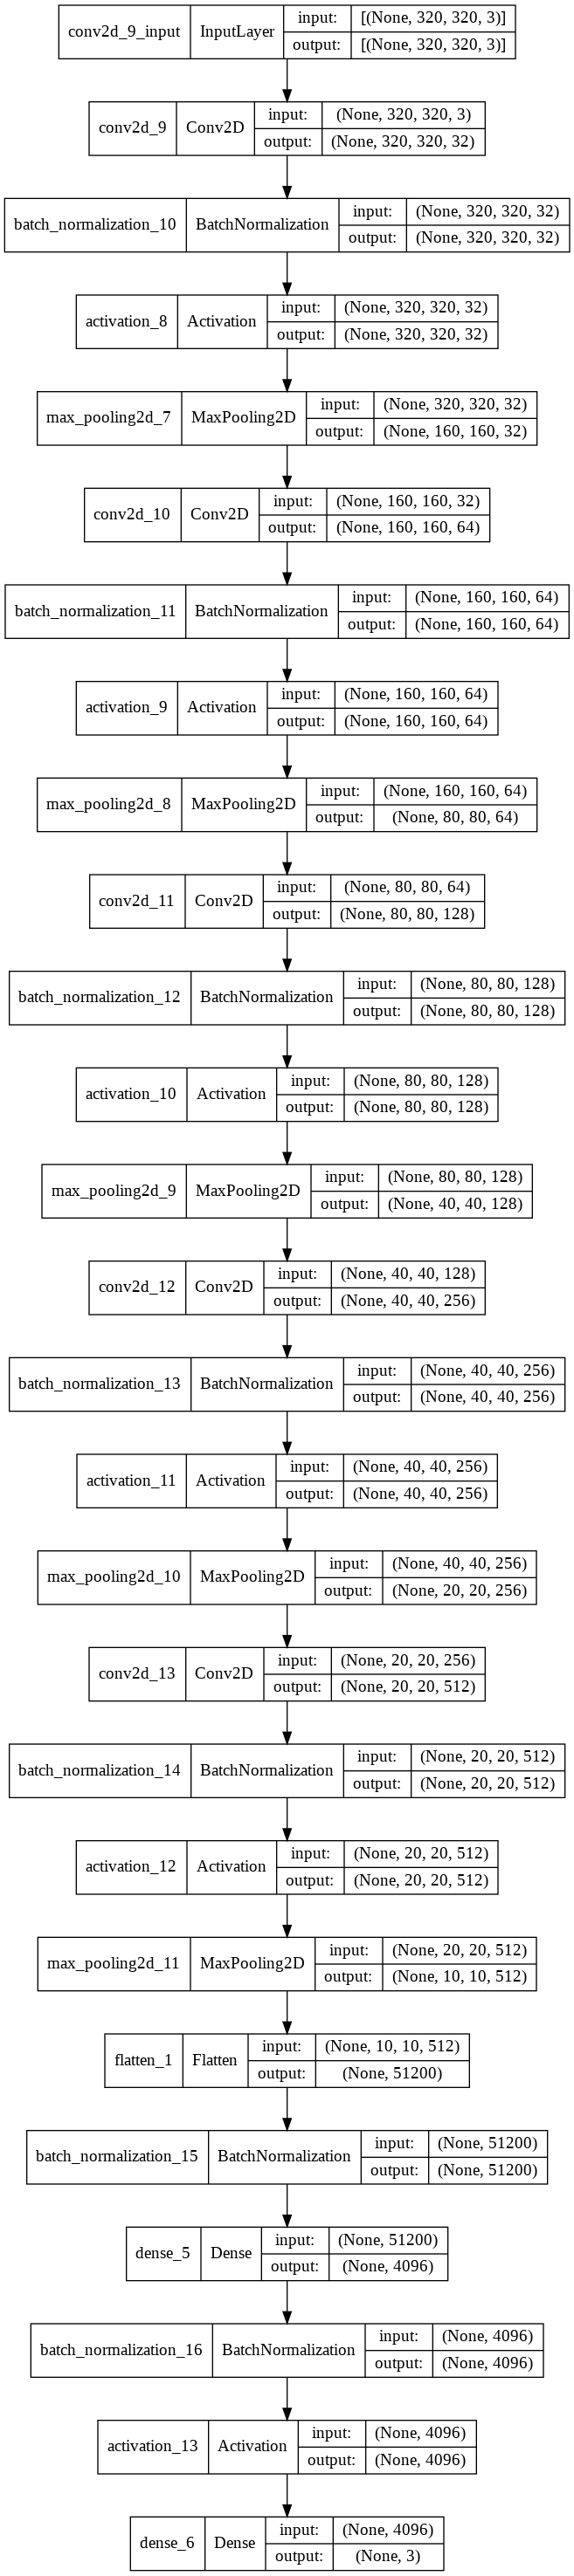

In [ ]:
keras.utils.plot_model(model3, "model3.png", show_shapes=True)

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
with tf.device('/device:GPU:0'):
  history = model3.fit(train,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid,
                       steps_per_epoch=260,
                       validation_steps=65)   

Epoch 1/50
260/260 [==============================] - 5062s 20s/step - loss: 0.9161 - accuracy: 0.6677 - val_loss: 2.9293 - val_accuracy: 0.3130
Epoch 2/50
260/260 [==============================] - 1100s 4s/step - loss: 0.5875 - accuracy: 0.7114 - val_loss: 1.0239 - val_accuracy: 0.5409
Epoch 3/50
260/260 [==============================] - 1099s 4s/step - loss: 0.5490 - accuracy: 0.7404 - val_loss: 0.9069 - val_accuracy: 0.6236
Epoch 4/50
260/260 [==============================] - 1094s 4s/step - loss: 0.5168 - accuracy: 0.7588 - val_loss: 1.7081 - val_accuracy: 0.5680
Epoch 5/50
260/260 [==============================] - 1087s 4s/step - loss: 0.4886 - accuracy: 0.7714 - val_loss: 0.9347 - val_accuracy: 0.6209
Epoch 6/50
260/260 [==============================] - 1074s 4s/step - loss: 0.4743 - accuracy: 0.7831 - val_loss: 1.0115 - val_accuracy: 0.6226
Epoch 7/50
260/260 [==============================] - 1077s 4s/step - loss: 0.4462 - accuracy: 0.7952 - val_loss: 1.8501 - val_accuracy

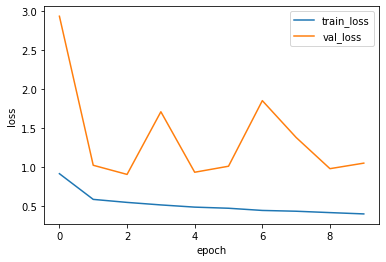

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

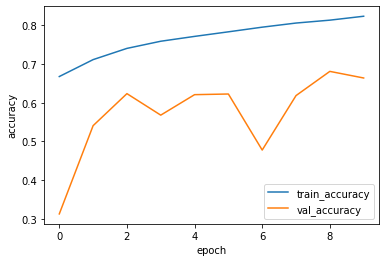

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model3.save('saved_models/model_3.h5')

In [ ]:
model = tf.keras.models.load_model('saved_models/model_3.h5')

result = model.evaluate(test_ds)
print("test accuracy: ", result[1])

5/5 [==============================] - 130s 32s/step - loss: 2.0035 - accuracy: 0.2989
test accuracy:  0.2988929748535156


##model4 (more conv layer)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
model4 = Sequential()

#conv layer 1
model4.add(Conv2D(32, (3,3), padding='same', input_shape=(320,320,3)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D((2,2)))

#conv layer 2
model4.add(Conv2D(64, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D((2,2)))
  

#conv layer 3
model4.add(Conv2D(128, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D((2,2)))
  

#conv layer 4
model4.add(Conv2D(256, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(256, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D((2,2)))
  

#conv layer 5
model4.add(Conv2D(512, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(512, (3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D((2,2)))
  

#FC layer
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(BatchNormalization())
model4.add(Dense(4096))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(4096))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(3, activation='softmax'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 320, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 320, 320, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 320, 320, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 160, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 160, 160, 64)     2

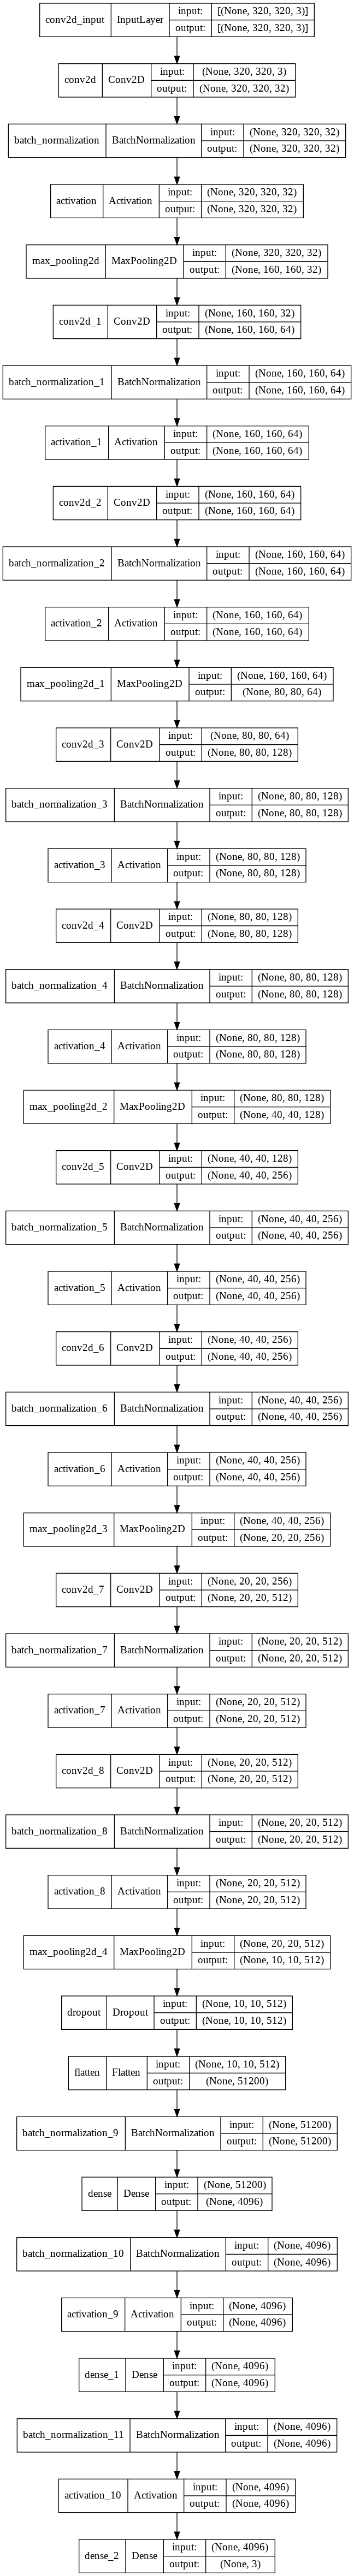

In [ ]:
keras.utils.plot_model(model4, "model4.png", show_shapes=True)

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
with tf.device('/device:GPU:0'):
  history = model4.fit(train,
                      epochs=50,
                      callbacks=early_stopping,
                      validation_data=valid,
                      steps_per_epoch=260,
                      validation_steps=65)  

Epoch 1/50
260/260 [==============================] - 24332s 94s/step - loss: 0.8895 - accuracy: 0.6489 - val_loss: 1.3172 - val_accuracy: 0.2493
Epoch 2/50
260/260 [==============================] - 941s 4s/step - loss: 0.6260 - accuracy: 0.6954 - val_loss: 1.1128 - val_accuracy: 0.5786
Epoch 3/50
260/260 [==============================] - 932s 4s/step - loss: 0.5862 - accuracy: 0.7051 - val_loss: 1.7497 - val_accuracy: 0.5608
Epoch 4/50
260/260 [==============================] - 933s 4s/step - loss: 0.5750 - accuracy: 0.7188 - val_loss: 1.0988 - val_accuracy: 0.5793
Epoch 5/50
260/260 [==============================] - 933s 4s/step - loss: 0.5453 - accuracy: 0.7295 - val_loss: 1.0169 - val_accuracy: 0.6313
Epoch 6/50
260/260 [==============================] - 930s 4s/step - loss: 0.5340 - accuracy: 0.7320 - val_loss: 1.8933 - val_accuracy: 0.5365
Epoch 7/50
260/260 [==============================] - 928s 4s/step - loss: 0.5152 - accuracy: 0.7437 - val_loss: 0.9721 - val_accuracy: 0.6

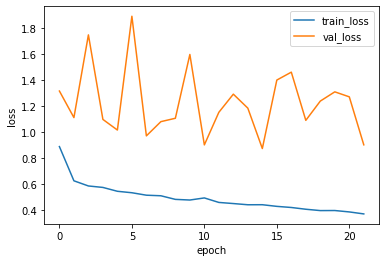

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

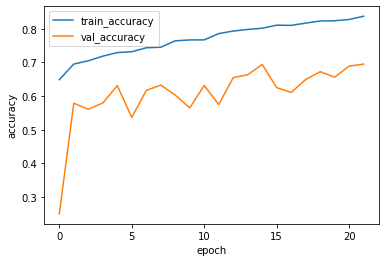

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model4.save('saved_models/model_4.h5')

In [ ]:
model = tf.keras.models.load_model('saved_models/model_4.h5')

result = model.evaluate(test_ds)
print("test accuracy: ", result[1])

5/5 [==============================] - 193s 48s/step - loss: 1.3822 - accuracy: 0.3764
test accuracy:  0.3763837516307831


##model5 (use pretrained model ( mobilenet ), Dropout(0.2))

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2, 
                                   preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

train_ds = train_datagen.flow_from_directory('data/data/', 
                                             target_size=(320,320), 
                                             batch_size=64, 
                                             class_mode='categorical',
                                             subset='training')

valid_ds = train_datagen.flow_from_directory('data/data/',
                                             target_size=(320,320),
                                             batch_size=64,
                                             class_mode='categorical',
                                             subset='validation')

test_ds = test_datagen.flow_from_directory('test_data/', 
                                           target_size=(320,320), 
                                           batch_size=64, 
                                           class_mode='categorical')

Found 16688 images belonging to 3 classes.
Found 4171 images belonging to 3 classes.
Found 271 images belonging to 3 classes.


In [ ]:
mobilenet_model = MobileNet(include_top=False, weights='imagenet', input_shape=(320,320,3))

model5 = Sequential([
                   mobilenet_model,
                   MaxPooling2D((2, 2)),
                   Dropout(0.2),
                   Flatten(),
                   Dropout(0.2),
                   Dense(3, activation='softmax')
])

model5.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 10, 10, 1024)     3228864   
 nal)                                                            
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 1024)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25600)             0         
                                                       

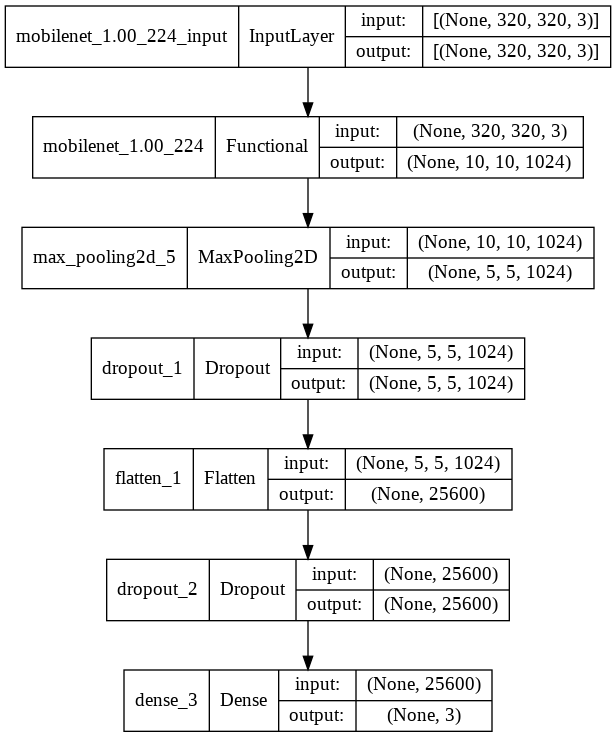

In [ ]:
keras.utils.plot_model(model5, "model5.png", show_shapes=True)

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model5.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
with tf.device('/device:GPU:0'):
  history = model5.fit(train_ds,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid_ds,
                       steps_per_epoch=260,
                       validation_steps=65)  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
260/260 [==============================] - 9039s 35s/step - loss: 1.4792 - accuracy: 0.6906 - val_loss: 1.9886 - val_accuracy: 0.4916
Epoch 2/50
260/260 [==============================] - 947s 4s/step - loss: 0.9653 - accuracy: 0.7531 - val_loss: 1.3762 - val_accuracy: 0.6207
Epoch 3/50
260/260 [==============================] - 945s 4s/step - loss: 0.7004 - accuracy: 0.7846 - val_loss: 1.3303 - val_accuracy: 0.6671
Epoch 4/50
260/260 [==============================] - 946s 4s/step - loss: 0.5311 - accuracy: 0.8070 - val_loss: 1.0101 - val_accuracy: 0.7209
Epoch 5/50
260/260 [==============================] - 944s 4s/step - loss: 0.4347 - accuracy: 0.8296 - val_loss: 0.9908 - val_accuracy: 0.7144
Epoch 6/50
260/260 [==============================] - 943s 4s/step - loss: 0.3752 - accuracy: 0.8483 - val_loss: 1.0474 - val_accuracy: 0.7058
Epoch 7/50
260/260 [==============================] - 940s 4s/step - loss: 0.3336 - accuracy: 0.8645 - val_loss: 0.9420 - val_accuracy: 0.71

In [ ]:
model5.save('saved_models/model_5.h5')

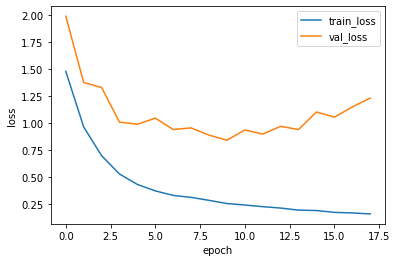

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

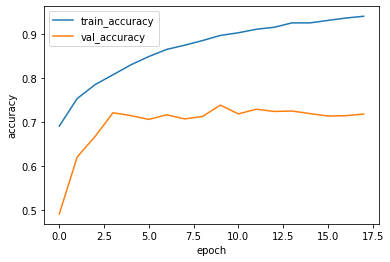

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model = tf.keras.models.load_model('saved_models/model_5.h5')

result = model.evaluate_generator(test_ds)
print("test accuracy: ", result[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test accuracy:  0.3468634784221649


##model6 (use pretrained model( mobilenet ), Dropout(0.4))

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mobilenet_model = MobileNet(include_top=False, weights='imagenet', input_shape=(320,320,3))

model6 = Sequential([
                   mobilenet_model,
                   MaxPooling2D((2, 2)),
                   Dropout(0.4),
                   Flatten(),
                   Dropout(0.4),
                   Dense(3, activation='softmax')
])

model6.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 10, 10, 1024)     3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 1024)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 5, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25600)             0         
                                                         

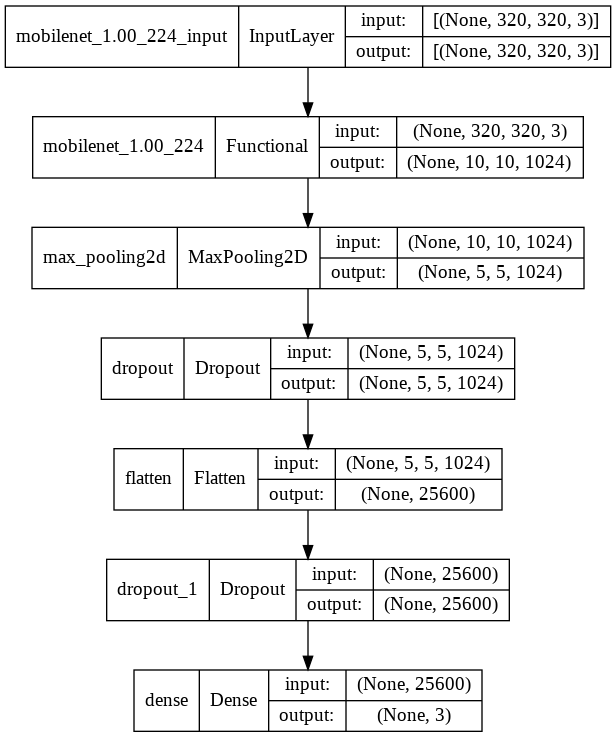

In [ ]:
keras.utils.plot_model(model6, "model6.png", show_shapes=True)

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model6.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
with tf.device('/device:GPU:0'):
  history = model6.fit(train_ds,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid_ds,
                       steps_per_epoch=260,
                      validation_steps=65) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
260/260 [==============================] - 17663s 68s/step - loss: 2.1122 - accuracy: 0.6646 - val_loss: 1.7130 - val_accuracy: 0.5123
Epoch 2/50
260/260 [==============================] - 953s 4s/step - loss: 1.4978 - accuracy: 0.7326 - val_loss: 1.5113 - val_accuracy: 0.6587
Epoch 3/50
260/260 [==============================] - 947s 4s/step - loss: 1.1368 - accuracy: 0.7590 - val_loss: 1.5033 - val_accuracy: 0.7041
Epoch 4/50
260/260 [==============================] - 942s 4s/step - loss: 0.8615 - accuracy: 0.7769 - val_loss: 1.3587 - val_accuracy: 0.7120
Epoch 5/50
260/260 [==============================] - 941s 4s/step - loss: 0.6804 - accuracy: 0.7902 - val_loss: 1.1584 - val_accuracy: 0.7111
Epoch 6/50
260/260 [==============================] - 941s 4s/step - loss: 0.5403 - accuracy: 0.8104 - val_loss: 1.1902 - val_accuracy: 0.7077
Epoch 7/50
260/260 [==============================] - 938s 4s/step - loss: 0.4708 - accuracy: 0.8219 - val_loss: 0.8877 - val_accuracy: 0.7

In [ ]:
model6.save('saved_models/model_6.h5')

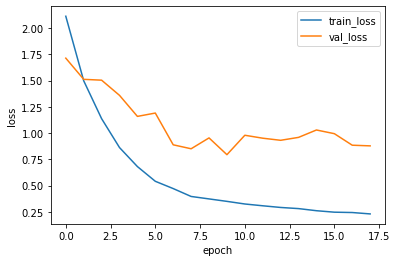

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

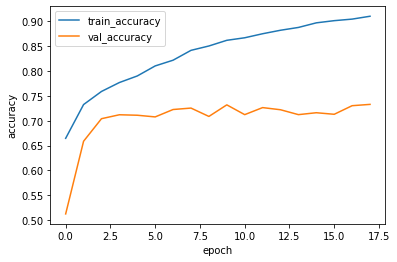

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model = tf.keras.models.load_model('saved_models/model_6.h5')

result = model.evaluate_generator(test_ds)
print("test accuracy: ", result[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


test accuracy:  0.3763837516307831


##model7 (use pretrained model( mobilenet ),Dropout(0.4)&Dropout(0.6))

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mobilenet_model = MobileNet(include_top=False, weights='imagenet', input_shape=(320,320,3))

model7 = Sequential([
                   mobilenet_model,
                   MaxPooling2D((2, 2)),
                   Dropout(0.4),
                   Flatten(),
                   Dropout(0.6),
                   Dense(3, activation='softmax')
])

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 10, 10, 1024)     3228864   
 nal)                                                            
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 1024)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25600)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                

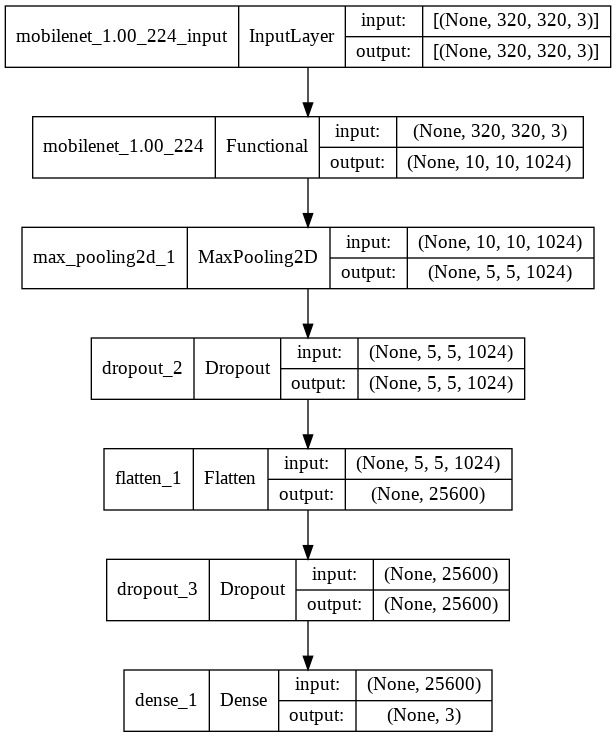

In [ ]:
keras.utils.plot_model(model7, "model7.png", show_shapes=True)

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model7.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=8)
with tf.device('/device:GPU:0'):
  history = model7.fit(train_ds,
                       epochs=50,
                       callbacks=early_stopping,
                       validation_data=valid_ds,
                       steps_per_epoch=260,
                      validation_steps=65) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
260/260 [==============================] - 966s 4s/step - loss: 2.8169 - accuracy: 0.6415 - val_loss: 7.7639 - val_accuracy: 0.4260
Epoch 2/50
260/260 [==============================] - 955s 4s/step - loss: 2.0029 - accuracy: 0.7152 - val_loss: 2.4575 - val_accuracy: 0.5981
Epoch 3/50
260/260 [==============================] - 946s 4s/step - loss: 1.6648 - accuracy: 0.7369 - val_loss: 1.3405 - val_accuracy: 0.7255
Epoch 4/50
260/260 [==============================] - 949s 4s/step - loss: 1.3069 - accuracy: 0.7563 - val_loss: 1.3852 - val_accuracy: 0.7190
Epoch 5/50
260/260 [==============================] - 953s 4s/step - loss: 0.9878 - accuracy: 0.7768 - val_loss: 1.4607 - val_accuracy: 0.6993
Epoch 6/50
260/260 [==============================] - 955s 4s/step - loss: 0.7773 - accuracy: 0.7857 - val_loss: 1.2484 - val_accuracy: 0.7055
Epoch 7/50
260/260 [==============================] - 954s 4s/step - loss: 0.6535 - accuracy: 0.7943 - val_loss: 1.0412 - val_accuracy: 0.7144

In [ ]:
model7.save('saved_models/model_7.h5')

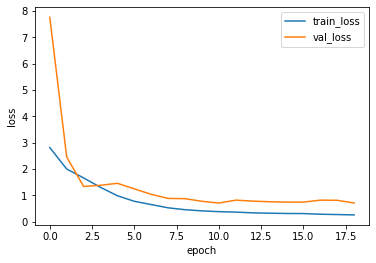

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

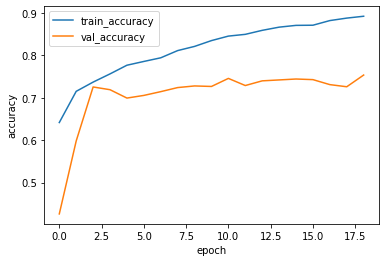

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model = tf.keras.models.load_model('saved_models/model_7.h5')

result = model.evaluate(test_ds)
print("test accuracy: ", result[1])

5/5 [==============================] - 234s 56s/step - loss: 1.5825 - accuracy: 0.3801
test accuracy:  0.38007381558418274
